In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

# csv file
nfl_data_path = "output_data/nfl2.csv"

nfl_data = pd.read_csv(nfl_data_path, encoding="latin1")

# starter dataframe
nfl_data

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [2]:
# seperate columns needed 
nfl_clean_df = nfl_data[["schedule_season", "team_home", "score_home", "team_away", "score_away", "over_under_line"]].copy()

# Add an empty column for the score total
nfl_clean_df["Total Score"] = ""

# Rename multiple columns
nfl_clean_df = nfl_clean_df.rename(columns={'schedule_season': 'Season', 'team_home': 'Home Team', 'score_home': 'Home Team Score', 'team_away': 'Away Team', 'score_away': 'Away Team Score', 'over_under_line': 'Over/Under'})

nfl_clean_df

,Season,Home Team,Home Team Score,Away Team,Away Team Score,Over/Under,Total Score
0,2013,DEN,49,BAL,27,49.5,
1,2013,BUF,21,NE,23,51.5,
2,2013,CAR,7,SEA,12,45.0,
3,2013,CHI,24,CIN,21,42.0,
4,2013,CLE,10,MIA,23,40.5,
...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,
2703,2022,SF,19,DAL,12,46.5,
2704,2022,KC,23,CIN,20,48.0,
2705,2022,PHI,31,SF,7,45.5,


In [3]:
# Calculate total score of each game
nfl_clean_df["Total Score"]=nfl_clean_df["Home Team Score"]+nfl_clean_df["Away Team Score"]

# determine whether it was over or under for that game
nfl_clean_df["Status"] = nfl_clean_df.apply(lambda x:  'Under'   if x['Over/Under'] > x['Total Score'] else 'Over', axis=1)

nfl_clean_df

,Season,Home Team,Home Team Score,Away Team,Away Team Score,Over/Under,Total Score,Status
0,2013,DEN,49,BAL,27,49.5,76,Over
1,2013,BUF,21,NE,23,51.5,44,Under
2,2013,CAR,7,SEA,12,45.0,19,Under
3,2013,CHI,24,CIN,21,42.0,45,Over
4,2013,CLE,10,MIA,23,40.5,33,Under
...,...,...,...,...,...,...,...,...
2702,2022,BUF,10,CIN,27,48.5,37,Under
2703,2022,SF,19,DAL,12,46.5,31,Under
2704,2022,KC,23,CIN,20,48.0,43,Under
2705,2022,PHI,31,SF,7,45.5,38,Under


In [4]:
# Calculate how many games were over or under in each nfl season
over_under_count = nfl_clean_df.groupby(["Season", "Status"]).count()
over_under_count = nfl_clean_df.groupby(["Season", "Status"]).count()["Total Score"].reset_index()
over_under_count.rename(columns={'Total Score': 'Total Games'}, inplace=True)
over_under_count

,Season,Status,Total Games
0,2013,Over,139
1,2013,Under,128
2,2014,Over,127
3,2014,Under,140
4,2015,Over,128
5,2015,Under,139
6,2016,Over,145
7,2016,Under,122
8,2017,Over,122
9,2017,Under,145


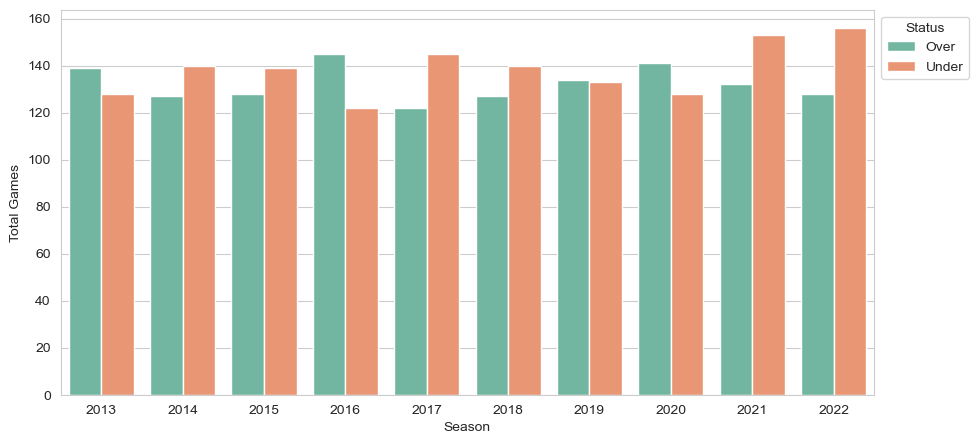

In [5]:
# Create bar plot
plt.figure(figsize=(10.5,5))

sns.set_style("whitegrid")
sns.set_palette("Set2")

ax = sns.barplot(data=over_under_count, x="Season", y="Total Games", hue="Status",  saturation=0.75, width=0.8)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig("images/overunderbar.png")

In [6]:
over_under_team = nfl_clean_df.groupby(["Home Team", "Status"]).count()
over_under_team = nfl_clean_df.groupby(["Home Team", "Status"]).count()["Total Score"].reset_index()
over_under_team.rename(columns={'Total Score': 'Total Games'}, inplace=True)
over_under_team

,Home Team,Status,Total Games
0,ARI,Over,38
1,ARI,Under,44
2,ATL,Over,41
3,ATL,Under,43
4,BAL,Over,36
...,...,...,...
59,TB,Under,45
60,TEN,Over,45
61,TEN,Under,38
62,WAS,Over,38


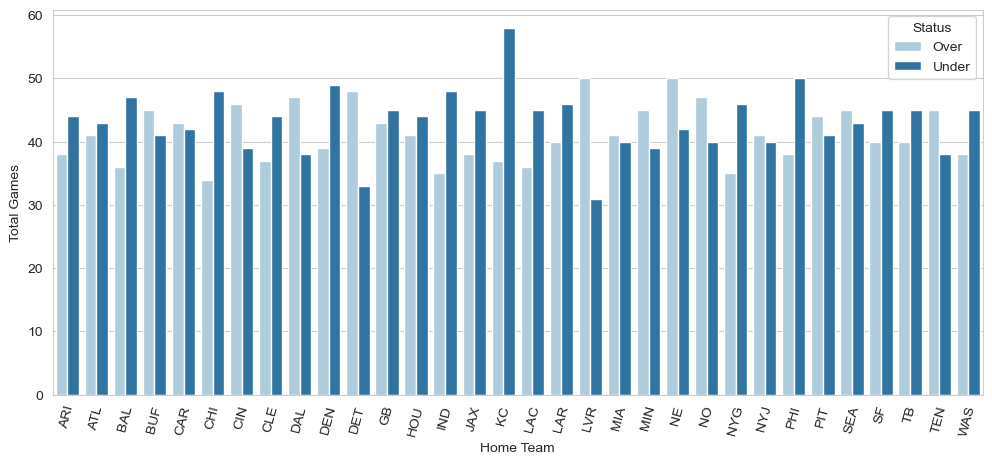

In [7]:
# Create bar plot
plt.figure(figsize=(12,5))

plt.xticks(rotation=75)
sns.set_style("whitegrid")
sns.set_palette("Paired")

sns.barplot(data=over_under_team, x="Home Team", y="Total Games", hue="Status",  saturation=0.75, width=0.8)
plt.savefig("images/overunderteam.png")

In [13]:
# Initialize variables to track max and min values
max_value = float('-inf')  # Set to negative infinity
min_value = float('inf')   # Set to positive infinity

# Iterate over the values in the column
for value in over_under_team['Total Games']:
    if value > max_value:
        max_value = value
    if value < min_value:
        min_value = value

# Print the max and min values
print("Maximum value:", max_value)
print("Minimum value:", min_value)


Maximum value: 58
Minimum value: 31


In [19]:
max_team = over_under_team.groupby(["Home Team"]).max()["Total Games"]
max_team

Home Team
ARI    44
ATL    43
BAL    47
BUF    45
CAR    43
CHI    48
CIN    46
CLE    44
DAL    47
DEN    49
DET    48
GB     45
HOU    44
IND    48
JAX    45
KC     58
LAC    45
LAR    46
LVR    50
MIA    41
MIN    45
NE     50
NO     47
NYG    46
NYJ    41
PHI    50
PIT    44
SEA    45
SF     45
TB     45
TEN    45
WAS    45
Name: Total Games, dtype: int64

In [21]:
min_team = over_under_team.groupby(["Home Team"]).min()["Total Games"]
min_team

Home Team
ARI    38
ATL    41
BAL    36
BUF    41
CAR    42
CHI    34
CIN    39
CLE    37
DAL    38
DEN    39
DET    33
GB     43
HOU    41
IND    35
JAX    38
KC     37
LAC    36
LAR    40
LVR    31
MIA    40
MIN    39
NE     42
NO     40
NYG    35
NYJ    40
PHI    38
PIT    41
SEA    43
SF     40
TB     40
TEN    38
WAS    38
Name: Total Games, dtype: int64